# Libraries
Pandas
GeoPandas - map visualization
matplotlib

In [111]:
import pandas as pd
import geopandas as gpd


### Function to draw map and visualize languages

In [112]:
def plot_langs(df: pd.DataFrame, continent: str):
    x = df[['Name','Latitude', 'Longitude']]
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

    gdf_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    filter = None
    if (continent == 'Eurasia') : filter = ((gdf_world['continent'] == 'Europe') | (gdf_world['continent'] == 'Asia'))
    elif (continent == 'Europe') : filter = ((gdf_world['continent'] == 'Europe') & (gdf_world['name'] != 'Russia')) #Asian part of Russia mess up map
    elif (continent == 'Eurafrica') : filter = (((gdf_world['continent'] == 'Europe') | (gdf_world['continent'] == 'Africa')) & (gdf_world['name'] != 'Russia')) #Asian part of Russia mess up map
    else: filter = gdf_world['continent'] > 'A' 

    # filter = gdf_world['continent'] > 'A'
    
    # ax = gdf_world[gdf_world['continent'] == 'Europe'].plot(figsize=(10, 6), color='white', edgecolor='black')
    ax = gdf_world[filter].plot(figsize=(10, 6), color='white', edgecolor='black')
    gdf.plot(ax=ax, marker='o', color='red', markersize=5)



In [113]:
df.head()

Name  Macroarea   Latitude   Longitude Glottocode  \
ID                                                                   
aab     Arapesh (Abu)  Papunesia  -3.450000  142.950000   abua1245   
aar              Aari     Africa   6.000000   36.583333   aari1239   
aba              Abau  Papunesia  -4.000000  141.250000   abau1245   
abb  Arabic (Chadian)     Africa  13.833333   20.833333   chad1249   
abd            Abidji     Africa   5.666667   -4.583333   abid1235   

    ISO639P3code        Family Subfamily           Genus GenusIcon ISO_codes  \
ID                                                                             
aab          aah    Torricelli       NaN  Kombio-Arapesh       NaN       aah   
aar          aiw  Afro-Asiatic    Omotic    South Omotic       NaN       aiw   
aba          aau         Sepik       NaN            Abau       NaN       aau   
abb          shu  Afro-Asiatic       NaN         Semitic       NaN       shu   
abd          abi   Niger-Congo       Kwa          Agneby       NaN       abi   

    Samples_100 Samples_200 Country_ID         Source            Parent_ID  \
ID                                                                           
aab       False       False         PG   Nekitel-1985  genus-kombioarapesh   
aar       False       False         ET  Hayward-1990a    genus-southomotic   
aba       False       False         PG    Bailey-1975           genus-abau   
abb       False       False         TD  Abu-Absi-1995        genus-semitic   
abd       False       False         CI            NaN         genus-agneby   

                       geometry  
ID                               
aab  POINT (142.95000 -3.45000)  
aar    POINT (36.58333 6.00000)  
aba  POINT (141.25000 -4.00000)  
abb   POINT (20.83333 13.83333)  
abd    POINT (-4.58333 5.66667)

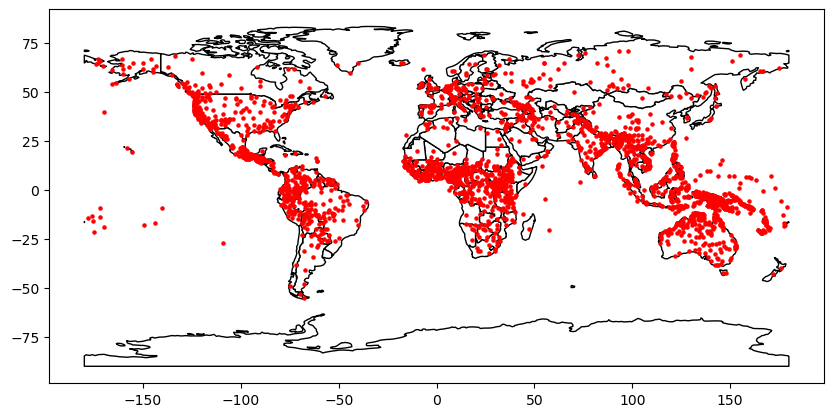

In [114]:
df = pd.read_csv('data/languages.csv', sep=',', index_col=0 )
plot_langs(df, 'world')

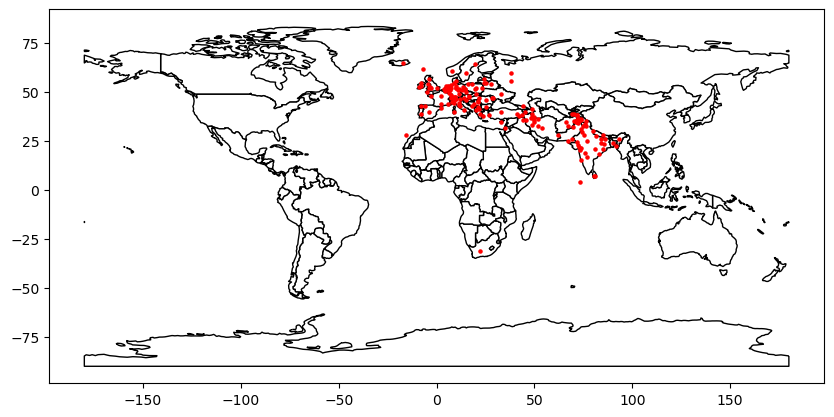

In [115]:
df_indo_europ = df[df['Family'] == 'Indo-European']
plot_langs(df_indo_europ, 'World')

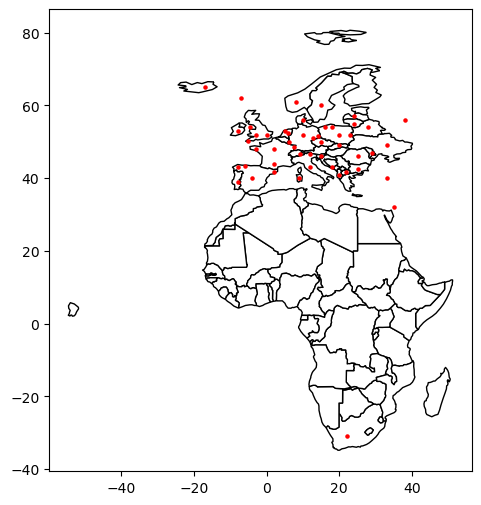

In [119]:
# remove languages from India 
filter = (df_indo_europ['Longitude'] <= 40)
#remove dialects
filter = filter & (df_indo_europ['Name'].str.contains('^[a-zA-Z]*$'))

df_europe_only = df_indo_europ[filter]

plot_langs(df_europe_only, 'Eurafrica')


# Output

In [120]:
df_europe_only.to_csv('data/european_languages.csv')